In [1]:
from fromscratchtoml.models import svm
import torch as ch
import numpy as np
from fromscratchtoml.toolbox import binary_visualize
from fromscratchtoml.toolbox.random import Distribution

%matplotlib inline

## Linearly seperable data

In [2]:
X1 = Distribution.linear(pts=100,
               mean=[8, 10],
               covr=[[1.5, 1], [1, 1.5]],
                        seed=100)
X2 = Distribution.linear(pts=100,
               mean=[9, 5],
               covr=[[1.5, 1], [1, 1.5]],
                        seed=100)


Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

In [3]:
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X, y)

In [4]:
X = ch.stack([X1, X2])

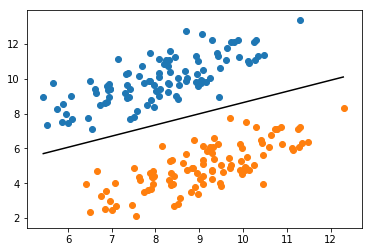

In [5]:
binary_visualize(X, clf_lin)

In [6]:
X1 = Distribution.linear(pts=10,
               mean=[8, 10],
               covr=[[1.5, 1], [1, 1.5]],
                        seed=100)
X2 = Distribution.linear(pts=10,
               mean=[9, 5],
               covr=[[1.5, 1], [1, 1.5]],
                        seed=100)
X = ch.cat((X1, X2))
_, projections = clf_lin.predict(X, return_projection=True)

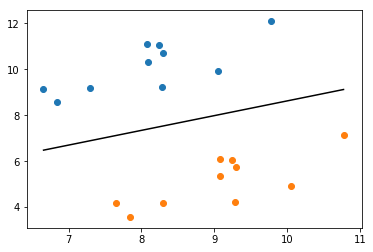

In [7]:
X = ch.stack([X1, X2])
binary_visualize(X, clf_lin)

## Non linearly seperable data

In [8]:
X1 = ch.Tensor([[10,10],[6,6],[6,11],[3,15],[12,6],[9,5],[16,3],[11,5]])
X2 = ch.Tensor([[3,6],[6,3],[2,9],[9,2],[18,1],[1,18],[1,13],[13,1]])
Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

In [9]:
clf = svm.SVC(kernel='polynomial', const=0, degree=2)
clf.fit(X, y)

In [10]:
clf.predict(X1)


 1
 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 8]

In [11]:
clf.predict(X2)


-1
-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 8]

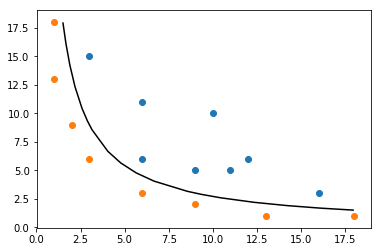

In [12]:
X = ch.stack([X1, X2])
binary_visualize(X, clf)

## RBF

In [13]:
X1 = Distribution.radial_binary(pts=10,
               mean=[0, 0],
               start=1,
               end=2)
X2 = Distribution.radial_binary(pts=10,
               mean=[0, 0],
               start=4,
               end=5)

Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

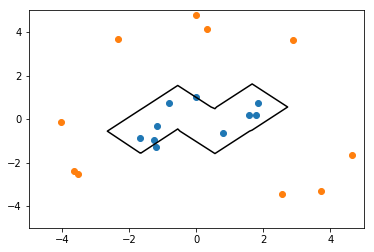

In [14]:
clf = svm.SVC(kernel='rbf', gamma=0.2)
clf.fit(X, y)
XX = ch.stack([X1, X2])
binary_visualize(XX, clf, xlim=[-5, 5], ylim=[-5, 5])

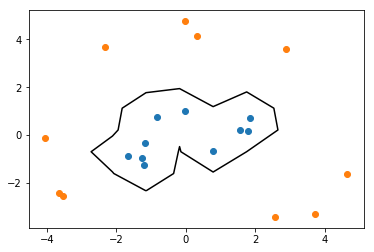

In [15]:
clf = svm.SVC(kernel='rbf', gamma=0.4)
clf.fit(X, y)
XX = ch.stack([X1, X2])
binary_visualize(XX, clf)

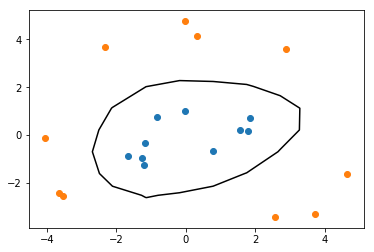

In [16]:
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(X, y)
XX = ch.stack([X1, X2])
binary_visualize(XX, clf)

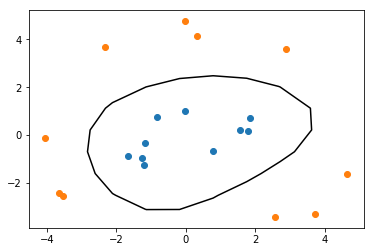

In [17]:
clf = svm.SVC(kernel='rbf', gamma=2)
clf.fit(X, y)
XX = ch.stack([X1, X2])
binary_visualize(XX, clf)

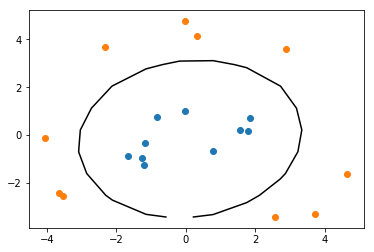

In [18]:
clf = svm.SVC(kernel='rbf', gamma=10)
clf.fit(X, y)
XX = ch.stack([X1, X2])
binary_visualize(XX, clf)